In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", 
        rc={"figure.figsize":(12,8), 
            "axes.labelsize":14, 
            "xtick.labelsize":12, 
            "ytick.labelsize":12})

## A. Potential Problems with Linear Regression
 
1. Correlation of error terms
1. Non-linear relationship between $Y$ and $X$
1. Heteroscedasticity: non-constant variance of error terms
1. High-leverage points
1. Outliers
1. Collinearity

### Boston Housing Data

In [2]:
df = pd.read_csv("../../data/csv/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per \$10,000  
PTRATIO - pupil-teacher ratio by town  
BLACK - $1000(Bk - 0.63)^2$, where Bk is the proportion of blacks by town  
LSTAT - percentage lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 2. Non-linear Relationship Between $Y$ and $X$

Identification:  
The plot of residuals vs. fitted (predicted) values $\hat{y_i}$ has a pattern

Solution:  
Transform $X$

#### 3. Heteroscedasticity

Identification:  
The plot of residuals vs. fitted values has a pattern

Solution:  
Transform $Y$

In [5]:
# Predictors
x = df.iloc[:,:-1]
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
# Fit the linear model
lm = smf.ols(formula = "medv ~ x", data = df).fit()

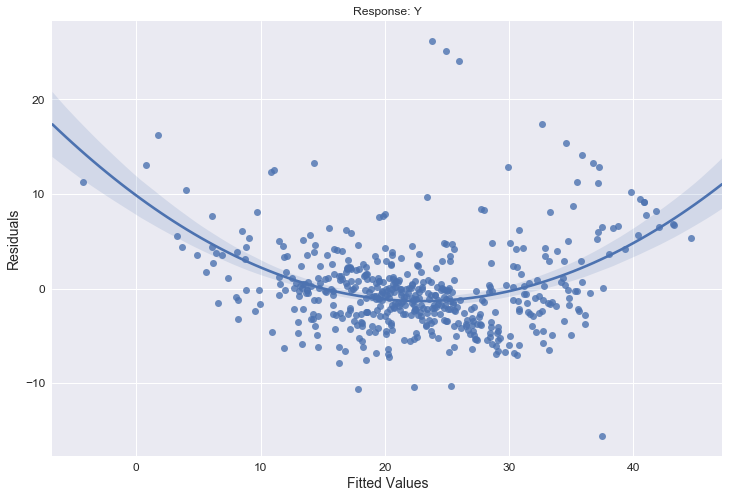

In [7]:
fig = sns.regplot(x=lm.predict(), y=lm.resid, order=2)
fig.set(xlabel='Fitted Values', ylabel='Residuals', title='Response: Y');

The plot of residuals vs. fitted values has a parabolic shape. Let's try fitting the model with $\log(Y)$ and $\sqrt{Y}$:

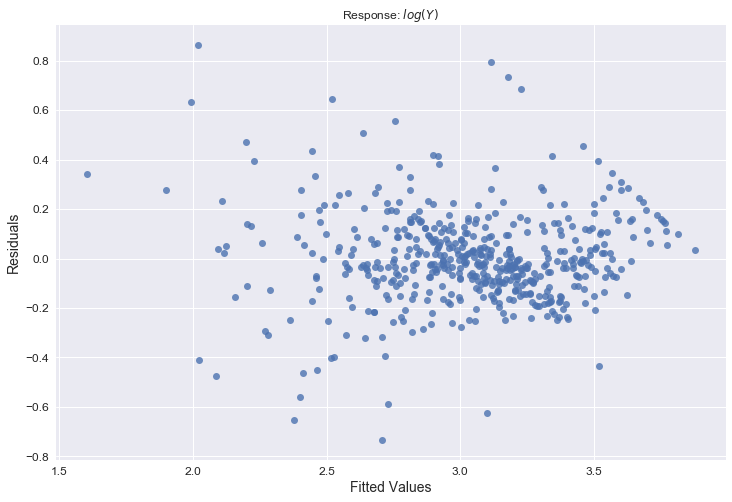

In [8]:
lmLog = smf.ols(formula = "np.log(medv) ~ x", data = df).fit()
fig = sns.regplot(x=lmLog.predict(), y=lmLog.resid, fit_reg=False)
fig.set(xlabel='Fitted Values', ylabel='Residuals', title=r'Response: $log(Y)$');

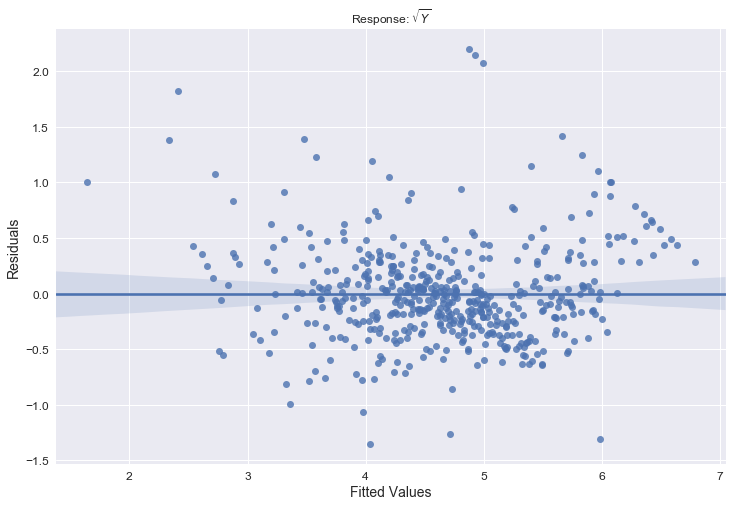

In [9]:
lmSqrt = smf.ols(formula = "np.sqrt(medv) ~ x", data = df).fit()
fig = sns.regplot(x=lmSqrt.predict(), y=lmSqrt.resid)
fig.set(xlabel='Fitted Values', ylabel='Residuals', title=r'Response: $\sqrt{Y}$');

The plot with $log(Y)$ has a fan-in, funnel shape. The plot with $\sqrt{Y}$ has a better random pattern about 0.

#### 4. High-leverage Points

Definition:  
A predictor value $x_i$ that doesn't follow the pattern of the remaining predictor values, and thus affecting the estimated regression line.

Identification:  
$x_i$ is said to have high leverage if its leverage statistic $> \frac{p+1}{n}$, where $p=$ # of predictors and $n=$ # observations

Solution:  
Consider removing this $x_i$ from the overall dataset, particularly if it is also an outlier


In [10]:
df.shape

(506, 14)

Any observation whose leverage statistic is greater than $\frac{p+1}{n}=\frac{13+1}{506}=0.0277$ counts as a high-leverage point.

In [11]:
influence = lm.get_influence()

In [12]:
# Calculate Leverage Statistic
leverage = influence.hat_matrix_diag
dfRes = pd.concat([df, pd.Series(leverage, name="leverage")], axis=1)
print dfRes.shape
dfRes.head()

(506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,leverage
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.016925
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.011109
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.011823
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.015696
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.016110


In [13]:
# Top 5 high leverage data points
dfRes[dfRes["leverage"] > 0.0277].sort_values(by = "leverage", ascending = False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,leverage
380,88.97620,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4,0.305959
418,73.53410,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8,0.190101
405,67.92080,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,0.156433
410,51.13580,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0,0.124707
365,4.55587,0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,0.098515


#### 5. Outliers

Definition:  
$x_i$ is an outlier if the corresponding $y_i$ is far from the value predicted by the model

Identification:  
$x_i$ is an outlier if its studentized residual $>\left|3\right|$. A studentized residual $=\frac{e_i}{SE(e_i)}$

Solution:  
Consider removing this $x_i$ from the overall dataset

In [14]:
# Calculate Studentized Residuals
studentRes = influence.resid_studentized_external
dfRes = pd.concat([dfRes, pd.Series(studentRes, name="studentRes")], axis=1)
dfRes.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,leverage,studentRes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.016925,-1.276881
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.011109,-0.725580
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.011823,0.875828
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.015696,1.018104
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.016110,1.757836


In [15]:
# Data points with high studentized residuals
dfRes[np.absolute(dfRes["studentRes"]) > 3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,leverage,studentRes
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0,0.021979,3.032720
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9,0.076723,-3.457995
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0,0.066331,5.907411
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0,0.051979,3.807609
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0,0.052760,3.367841
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,0.020501,5.491079
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0,0.046792,5.322247
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9,0.053926,3.546859


The above 8 data points have both high studentized residuals > $|3|$ and high leverage of > 0.0277.

#### 6. Collinearity

Definition:  
Collinearity = two or more predictors are related to one another  
Multicollinearity = three or more predictors are related to one another

Identification:  
Large absolute values in the correlation matrix detects collinearity  
Large VIF (variance inflation factor) detects multicollinearity, where minimum VIF value is 1   
Convention: VIF > 10 is considered large and VIF > 5 is moderate

Solution:  
Either drop one of the correlated variables, or  
combine the collinear variables to form a new variable

In [16]:
# Correlation Matrix
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


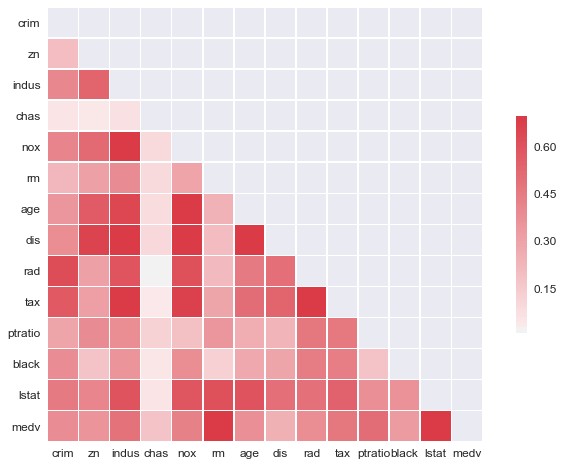

In [17]:
# Correlation Heatmap

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio; detecting absolute correlations >= 0.7
sns.heatmap(np.absolute(corr), 
            mask=mask, 
            cmap=cmap, 
            vmax=.7, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5});

Lots of collinear variables (absolute correlation value of >=0.7):   
Indus, Nox, Age, Dis, Rad, Tax are all correlated with each other, and  
Medv, Lstat, Rm are correlated.  
We see strong patterns (not necessarily linear) in the graphs of each combination of these variables.

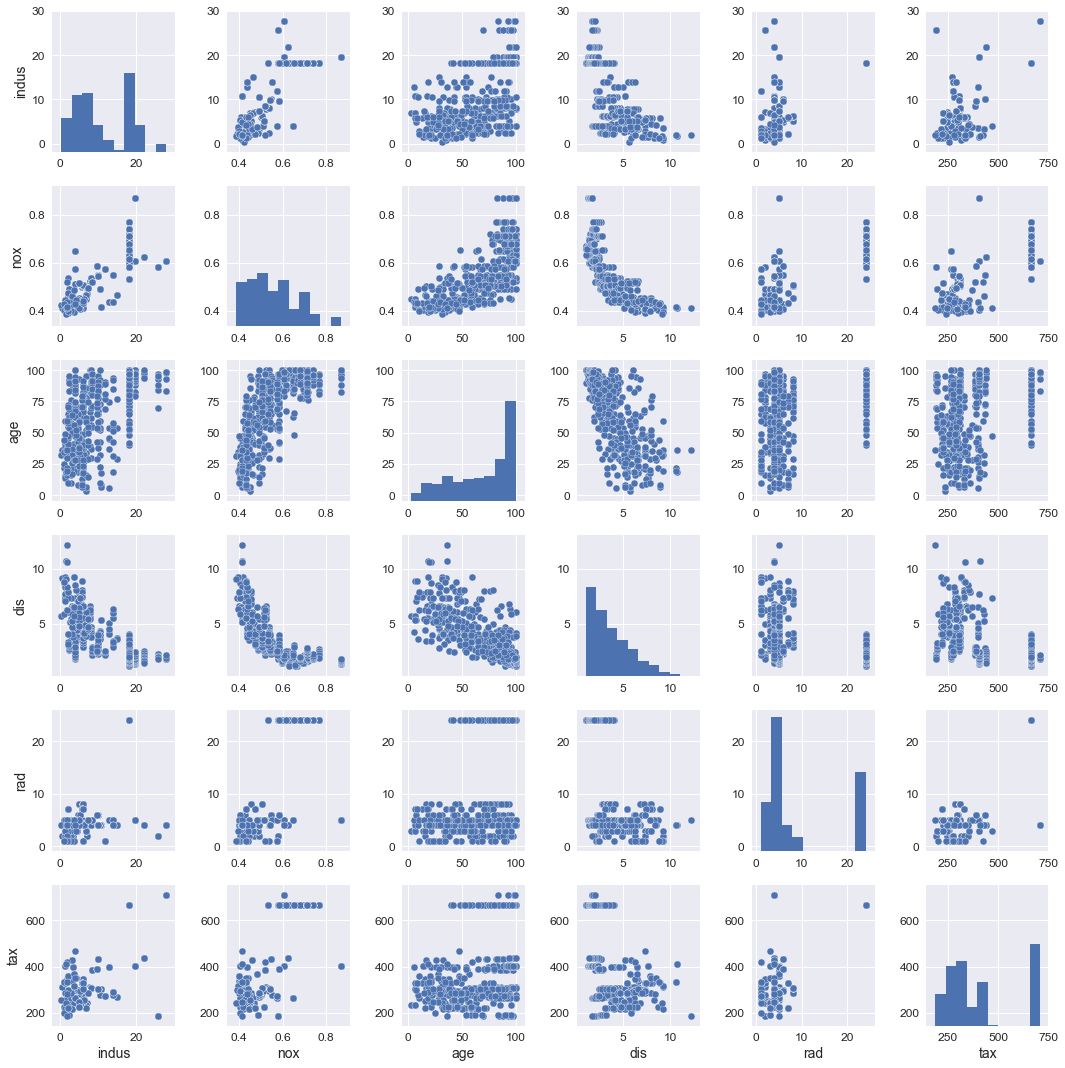

In [18]:
sns.pairplot(df, vars=['indus', 'nox', 'age', 'dis', 'rad', 'tax']);

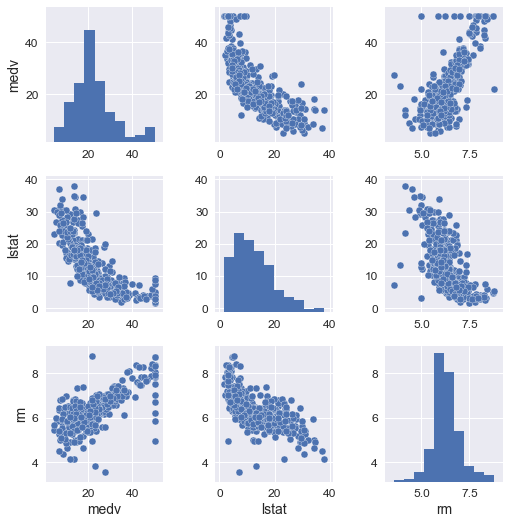

In [19]:
sns.pairplot(df, vars=['medv', 'lstat', 'rm']);

In [20]:
# calculate VIF
y, X = dmatrices("medv ~ x", data = df, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
zip(np.append(["intercept"], x.columns), np.round(vif, 3))

[('intercept', 585.26499999999999),
 ('crim', 1.792),
 ('zn', 2.2989999999999999),
 ('indus', 3.992),
 ('chas', 1.0740000000000001),
 ('nox', 4.3940000000000001),
 ('rm', 1.9339999999999999),
 ('age', 3.101),
 ('dis', 3.956),
 ('rad', 7.484),
 ('tax', 9.0090000000000003),
 ('ptratio', 1.7989999999999999),
 ('black', 1.349),
 ('lstat', 2.9409999999999998)]

VIF for Tax and Rad are quite high. The VIF for Tax, for example, means that the variance of the estimated coefficient of Tax is inflated by a factor of 9 because Tax is highly correlated with at least one of the other predictors in the model. 

Going back to the correlation matrix, Tax is highly correlated (> 0.7) with both Indus and Rad. We may consider removing one of these redundant predictors from the model. This choice may be governed by either scientific or practical reasons. The scientific strategies for *variable selection* is explored in Chapter 6.

## B. Multiple Linear Regression

Regress medv (response) onto all other variables

In [21]:
model = LinearRegression()

### Model Fit

In [22]:
model.fit(X=x, y=df['medv'])

/Users/divyanair/.pyenv/versions/2.7.14/envs/interview_env/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print model.intercept_ 
print model.coef_

36.4594883851
[ -1.08011358e-01   4.64204584e-02   2.05586264e-02   2.68673382e+00
  -1.77666112e+01   3.80986521e+00   6.92224640e-04  -1.47556685e+00
   3.06049479e-01  -1.23345939e-02  -9.52747232e-01   9.31168327e-03
  -5.24758378e-01]


### Model Accuracy

In [24]:
ypred = model.predict(X=x)
ypred[:5]

array([ 30.00384338,  25.02556238,  30.56759672,  28.60703649,  27.94352423])

In [25]:
r2_score(df['medv'], ypred)

0.74064266410940938

The coefficient of determination is $R^2=0.74$ indicating a strong, positive linear relationship between medv and all predictors.

In [26]:
print "MSE is {}".format(np.round(mean_squared_error(df['medv'], ypred),2))

MSE is 21.89


In [27]:
# best value 1; lower values are worse
explained_variance_score(df['medv'], ypred)

0.74064266410940938